# Lab 2: `keras` and Neural Networks

## Date:  Saturday, October 20th 2018

#### Authors: David Sondak and Pavlos Protopapas

In lab 1, we created our own neural network by writing some simple `python` functions.  We focused on a regression problem wherein we tried to learn a function.  We practiced using the logistic activation function in a network with multiple nodes, but a single hidden layer.  Some of the key observations were:
* Increasing the number of nodes allows us to represent more complicated functions  
* The weights and biases have a very big impact on the solution
* Finding the "correct" weights and biases is really hard to do manually
* There must be a better method for determining the weights and biases automatically

We also didn't assess the effects of different activation functions or different network depths.

Today, we will repeat some of the analysis from last time, but in the lab we will use [`keras`](https://keras.io/).

## I. Architectures Encoding Functions

**Motivating Question:** What exact kind of mathematical/statistical object is encoded by a neural network?

**Exercise #1:** For a network with the following architecture (a single output and one hidden layer), write the closed form expression for the function $f$ represented by the network.

Assume that the activation function at the output node is the identity funciton. Use the following notation:
- let $\mathbf{x}\in \mathbb{R}^D$ be the input; let the components of $\mathbf{x}$ be indexed by $d$
- let $H$ be the total number of hidden nodes, indexed by $h$
- let $\phi_h$ be the activation function at the hidden node $h$
- let $\mathbf{u}_h \mathbb{R}^D$ be the weights connecting the input to the $h$-th hidden node
- let $\mathbf{a} \mathbb{R}^H$ be the bias for the hidden layer
- let $\mathbf{v} \in \mathbb{R}^H$ be the weights connects the hidden nodes to the output
- let $b \in \mathbb{R}$ be the bias for the output layer
![](figs/single_hidden_layer.jpg)

**Solution:** 
For each hidden node $h$, a linear combination of the input, $\mathbf{u}_h^\top \mathbf{x} + \mathbf{a}$, is transformed by the activation function $\phi_h$. Thus, the output of each hidden node $h$ is
$$
\phi_h(\mathbf{u}_h^\top \mathbf{x} + \mathbf{a}).
$$
At the output node, a linear combination of the hidden nodes are taken. Since the activation function here is the identity, the final output of the MLP is
$$
\begin{aligned}
f(\mathbf{x}) = b + \sum_{h=1}^H v_h\phi_h(\mathbf{u}_h^\top \mathbf{x} + \mathbf{a}).
\end{aligned}
$$

## II. Regression

**Motivating Question:** We saw in Part I that each neural network represents a function that depends on our choice of activation function for each node. In practice, we choose the same activation function for all nodes, from a small set of simple functions. It makes sense to ask just how expressive such networks can be. That is, ***can any function be reasonably approximated by a neural network?*** For a fixed function, ***what kind of archicture do we need in order to approximate it?*** Deep (multiple layers) or wide (many hidden nodes in one layer)?
![](figs/activation-functions.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# `Keras` Basics 

## Keras Installation

If you haven't already, please install `Keras` using the instructions found at [https://keras.io/#installation](https://keras.io/#installation)

Choose the TensorFlow installation instructions (found at [https://www.tensorflow.org/install/](https://www.tensorflow.org/install/) ).

Note the following:

* cuDNN is only required if your machine has an NVidia graphics card (GPU)
* For this tutorial, HDF5 and h5py are not required
* graphviz and pydot are not required

In [2]:
import keras
keras.__version__

Using TensorFlow backend.


'2.1.6'

# Exploring Neural Networks
Let's try to redo the problem from last week.  Recall that we had a function $$f\left(x\right) = \exp\left(-x^{2}\right)$$ and we wanted to use a neural network to approximate that function.  This week, we will use `keras` to do the true optimization.

First, we import the necessary `keras` modules.

In [3]:
from keras import models
from keras import layers

Now we set up a network.  Let's do a single hidden layer with two neurons.  Last week we tried to manually tune the weights and things didn't work so well.

Before we get started, we need to create some data.  We will generate data points from an underlying function (here the Guassian).  Then we will use the `sklearn` `train_test_split` method to split the dataset into training and testing portions.  Remember that we train a machine learning algorithm on the training set and then assess the algorithm's performance on the test set.

In [4]:
from sklearn.model_selection import train_test_split

n_samples = 1000 # set the number of samples to take for each toy dataset
test_size = 0.3 # set the proportion of toy data to hold out for testing
random_seed = 1 # set the random seed to make the experiment reproducible 
np.random.seed(random_seed)

# define a function
f = lambda x: np.exp(-x * x)
X = np.random.permutation(np.linspace(-5, 5, n_samples)) # choose some points from the function - this is our toy dataset 
Y = f(X)

# create training and testing data from this set of points
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size)

Let's create a neural network model with `keras`.  We're going to use a single layer and just $2$ neurons in that layer.  To be consisten with last week, we will start with the sigmoid activation function.  We also choose a linear output layer like last time.  The loss function is selected to be the mean squared error.  In addition to these choices we must also specify our initial weights as well as the optimization method that will be used to minimize the loss function.

In [5]:
H = 2 # number of nodes in the layer
input_dim = 1 # input dimension: just x

model = models.Sequential() # create sequential multi-layer perceptron

# layer 0, our hidden layer
model.add(layers.Dense(H, input_dim=input_dim, 
                kernel_initializer='normal', 
                activation='sigmoid')) 
# layer 1
model.add(layers.Dense(1, kernel_initializer='normal', 
                activation='linear')) 

# configure the model
model.compile(loss='mean_squared_error', optimizer='adam')

Our model is now ready to use.  We haven't trained it yet, but we'll do that now using the `fit` method.  Notice that we also need to specify the *batch size* for the stochastic gradient decent algorithm as well as the number of epochs to run.

In [6]:
# fit the model
model.fit(X_train, Y_train, batch_size=100, epochs=500, verbose=1)

Epoch 1/500
700/700 [==============================] - 0s 251us/step - loss: 0.1135
Epoch 2/500
700/700 [==============================] - 0s 12us/step - loss: 0.1097
Epoch 3/500
700/700 [==============================] - 0s 13us/step - loss: 0.1066
Epoch 4/500
700/700 [==============================] - 0s 23us/step - loss: 0.1036
Epoch 5/500
700/700 [==============================] - 0s 14us/step - loss: 0.1012
Epoch 6/500
700/700 [==============================] - 0s 16us/step - loss: 0.0994
Epoch 7/500
700/700 [==============================] - 0s 21us/step - loss: 0.0976
Epoch 8/500
700/700 [==============================] - 0s 16us/step - loss: 0.0965
Epoch 9/500
700/700 [==============================] - 0s 19us/step - loss: 0.0956
Epoch 10/500
700/700 [==============================] - 0s 13us/step - loss: 0.0948
Epoch 11/500
700/700 [==============================] - 0s 35us/step - loss: 0.0944
Epoch 12/500
700/700 [==============================] - 0s 13us/step - loss: 0.0940


700/700 [==============================] - 0s 17us/step - loss: 0.0933
Epoch 99/500
700/700 [==============================] - 0s 17us/step - loss: 0.0933
Epoch 100/500
700/700 [==============================] - 0s 18us/step - loss: 0.0933
Epoch 101/500
700/700 [==============================] - 0s 17us/step - loss: 0.0933
Epoch 102/500
700/700 [==============================] - 0s 19us/step - loss: 0.0933
Epoch 103/500
700/700 [==============================] - 0s 16us/step - loss: 0.0933
Epoch 104/500
700/700 [==============================] - 0s 16us/step - loss: 0.0933
Epoch 105/500
700/700 [==============================] - 0s 23us/step - loss: 0.0934
Epoch 106/500
700/700 [==============================] - 0s 15us/step - loss: 0.0933
Epoch 107/500
700/700 [==============================] - 0s 15us/step - loss: 0.0933
Epoch 108/500
700/700 [==============================] - 0s 15us/step - loss: 0.0933
Epoch 109/500
700/700 [==============================] - 0s 18us/step - loss: 0.

700/700 [==============================] - 0s 16us/step - loss: 0.0933
Epoch 195/500
700/700 [==============================] - 0s 16us/step - loss: 0.0933
Epoch 196/500
700/700 [==============================] - 0s 18us/step - loss: 0.0933
Epoch 197/500
700/700 [==============================] - 0s 12us/step - loss: 0.0933
Epoch 198/500
700/700 [==============================] - 0s 12us/step - loss: 0.0933
Epoch 199/500
700/700 [==============================] - 0s 11us/step - loss: 0.0933
Epoch 200/500
700/700 [==============================] - 0s 14us/step - loss: 0.0933
Epoch 201/500
700/700 [==============================] - 0s 15us/step - loss: 0.0933
Epoch 202/500
700/700 [==============================] - 0s 15us/step - loss: 0.0933
Epoch 203/500
700/700 [==============================] - 0s 16us/step - loss: 0.0933
Epoch 204/500
700/700 [==============================] - 0s 18us/step - loss: 0.0933
Epoch 205/500
700/700 [==============================] - 0s 16us/step - loss: 0

700/700 [==============================] - 0s 17us/step - loss: 0.0931
Epoch 291/500
700/700 [==============================] - 0s 16us/step - loss: 0.0931
Epoch 292/500
700/700 [==============================] - 0s 13us/step - loss: 0.0931
Epoch 293/500
700/700 [==============================] - 0s 17us/step - loss: 0.0931
Epoch 294/500
700/700 [==============================] - 0s 15us/step - loss: 0.0931
Epoch 295/500
700/700 [==============================] - 0s 16us/step - loss: 0.0931
Epoch 296/500
700/700 [==============================] - 0s 13us/step - loss: 0.0931
Epoch 297/500
700/700 [==============================] - 0s 15us/step - loss: 0.0930
Epoch 298/500
700/700 [==============================] - 0s 15us/step - loss: 0.0930
Epoch 299/500
700/700 [==============================] - 0s 16us/step - loss: 0.0930
Epoch 300/500
700/700 [==============================] - 0s 13us/step - loss: 0.0930
Epoch 301/500
700/700 [==============================] - 0s 17us/step - loss: 0

700/700 [==============================] - 0s 12us/step - loss: 0.0768
Epoch 387/500
700/700 [==============================] - 0s 15us/step - loss: 0.0764
Epoch 388/500
700/700 [==============================] - 0s 15us/step - loss: 0.0760
Epoch 389/500
700/700 [==============================] - 0s 17us/step - loss: 0.0755
Epoch 390/500
700/700 [==============================] - 0s 12us/step - loss: 0.0751
Epoch 391/500
700/700 [==============================] - 0s 14us/step - loss: 0.0747
Epoch 392/500
700/700 [==============================] - 0s 19us/step - loss: 0.0742
Epoch 393/500
700/700 [==============================] - 0s 14us/step - loss: 0.0738
Epoch 394/500
700/700 [==============================] - 0s 13us/step - loss: 0.0734
Epoch 395/500
700/700 [==============================] - 0s 17us/step - loss: 0.0729
Epoch 396/500
700/700 [==============================] - 0s 15us/step - loss: 0.0725
Epoch 397/500
700/700 [==============================] - 0s 13us/step - loss: 0

700/700 [==============================] - 0s 19us/step - loss: 0.0317
Epoch 483/500
700/700 [==============================] - 0s 15us/step - loss: 0.0313
Epoch 484/500
700/700 [==============================] - 0s 15us/step - loss: 0.0309
Epoch 485/500
700/700 [==============================] - 0s 17us/step - loss: 0.0306
Epoch 486/500
700/700 [==============================] - 0s 11us/step - loss: 0.0302
Epoch 487/500
700/700 [==============================] - 0s 15us/step - loss: 0.0298
Epoch 488/500
700/700 [==============================] - 0s 15us/step - loss: 0.0295
Epoch 489/500
700/700 [==============================] - 0s 13us/step - loss: 0.0291
Epoch 490/500
700/700 [==============================] - 0s 15us/step - loss: 0.0288
Epoch 491/500
700/700 [==============================] - 0s 18us/step - loss: 0.0284
Epoch 492/500
700/700 [==============================] - 0s 16us/step - loss: 0.0281
Epoch 493/500
700/700 [==============================] - 0s 14us/step - loss: 0

Great!  We've trained a model.  Now it's time to explore the results.  The first thing to notice is that the loss function has a value of $0.930$.  This doesn't seem very small, but let's see what the results look like.

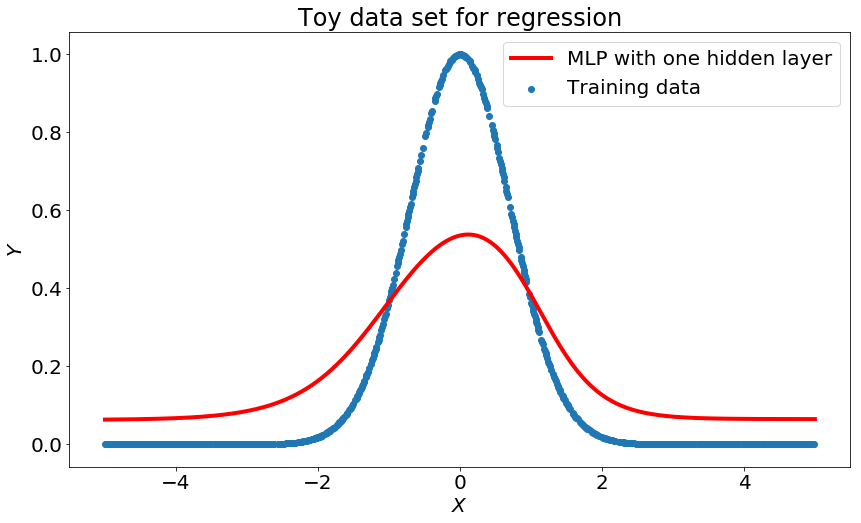

In [7]:
# use our model to predict in the range we want
X_range = np.linspace(-5, 5, 1000)
y_pred = model.predict(X_range)

fig, ax = plt.subplots(1, 1, figsize=(14,8))
ax.scatter(X_train, Y_train, label='Training data')
ax.plot(X_range, y_pred, lw=4, color='r', label='MLP with one hidden layer')
ax.set_xlabel(r'$X$', fontsize=20)
ax.set_ylabel(r'$Y$', fontsize=20)
ax.set_title('Toy data set for regression', fontsize=24)
ax.tick_params(labelsize=20)

ax.legend(loc=1, fontsize=20)

plt.show()

Wow, that's pretty awful.  Does the neural network simply not work?  It's too early to conclude that.

### Exercise
Change the number of neurons in the layer, change the batch size, perhaps tweak the number of epochs.  You can even change the activation function if you'd like.  Can you get better results?  What worked the best?

### Solution

In [8]:
H = 16 # number of nodes in the layer
input_dim = 1 # input dimension: just x

model = models.Sequential() # create sequential multi-layer perceptron

# layer 0, our hidden layer
model.add(layers.Dense(H, input_dim=input_dim, 
                kernel_initializer='normal', 
                activation='tanh')) 
# layer 1
model.add(layers.Dense(1, kernel_initializer='normal', 
                activation='linear')) 

# compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# fit the model
model_history = model.fit(X_train, Y_train, batch_size=100, epochs=1000, verbose=1)

Epoch 1/1000
700/700 [==============================] - 0s 178us/step - loss: 0.1258
Epoch 2/1000
700/700 [==============================] - 0s 12us/step - loss: 0.1211
Epoch 3/1000
700/700 [==============================] - 0s 16us/step - loss: 0.1170
Epoch 4/1000
700/700 [==============================] - 0s 22us/step - loss: 0.1131
Epoch 5/1000
700/700 [==============================] - 0s 19us/step - loss: 0.1089
Epoch 6/1000
700/700 [==============================] - 0s 22us/step - loss: 0.1048
Epoch 7/1000
700/700 [==============================] - 0s 23us/step - loss: 0.1016
Epoch 8/1000
700/700 [==============================] - 0s 21us/step - loss: 0.0983
Epoch 9/1000
700/700 [==============================] - 0s 29us/step - loss: 0.0959
Epoch 10/1000
700/700 [==============================] - 0s 22us/step - loss: 0.0942
Epoch 11/1000
700/700 [==============================] - 0s 21us/step - loss: 0.0932
Epoch 12/1000
700/700 [==============================] - 0s 31us/step - l

700/700 [==============================] - 0s 13us/step - loss: 0.0115
Epoch 98/1000
700/700 [==============================] - 0s 15us/step - loss: 0.0112
Epoch 99/1000
700/700 [==============================] - 0s 14us/step - loss: 0.0109
Epoch 100/1000
700/700 [==============================] - 0s 18us/step - loss: 0.0106
Epoch 101/1000
700/700 [==============================] - 0s 14us/step - loss: 0.0103
Epoch 102/1000
700/700 [==============================] - 0s 14us/step - loss: 0.0100
Epoch 103/1000
700/700 [==============================] - 0s 12us/step - loss: 0.0097
Epoch 104/1000
700/700 [==============================] - 0s 16us/step - loss: 0.0095
Epoch 105/1000
700/700 [==============================] - 0s 16us/step - loss: 0.0092
Epoch 106/1000
700/700 [==============================] - 0s 18us/step - loss: 0.0090
Epoch 107/1000
700/700 [==============================] - 0s 15us/step - loss: 0.0087
Epoch 108/1000
700/700 [==============================] - 0s 19us/step 

700/700 [==============================] - 0s 15us/step - loss: 9.3426e-04
Epoch 193/1000
700/700 [==============================] - 0s 16us/step - loss: 9.0685e-04
Epoch 194/1000
700/700 [==============================] - 0s 17us/step - loss: 8.8837e-04
Epoch 195/1000
700/700 [==============================] - 0s 14us/step - loss: 8.6171e-04
Epoch 196/1000
700/700 [==============================] - 0s 11us/step - loss: 8.4114e-04
Epoch 197/1000
700/700 [==============================] - 0s 19us/step - loss: 8.1873e-04
Epoch 198/1000
700/700 [==============================] - 0s 17us/step - loss: 7.9871e-04
Epoch 199/1000
700/700 [==============================] - 0s 17us/step - loss: 7.7856e-04
Epoch 200/1000
700/700 [==============================] - 0s 12us/step - loss: 7.5810e-04
Epoch 201/1000
700/700 [==============================] - 0s 16us/step - loss: 7.4045e-04
Epoch 202/1000
700/700 [==============================] - 0s 18us/step - loss: 7.2574e-04
Epoch 203/1000
700/700 [=

700/700 [==============================] - 0s 12us/step - loss: 1.4212e-04
Epoch 284/1000
700/700 [==============================] - 0s 19us/step - loss: 1.4121e-04
Epoch 285/1000
700/700 [==============================] - 0s 17us/step - loss: 1.3863e-04
Epoch 286/1000
700/700 [==============================] - 0s 16us/step - loss: 1.3568e-04
Epoch 287/1000
700/700 [==============================] - 0s 17us/step - loss: 1.3410e-04
Epoch 288/1000
700/700 [==============================] - 0s 14us/step - loss: 1.3261e-04
Epoch 289/1000
700/700 [==============================] - 0s 15us/step - loss: 1.3210e-04
Epoch 290/1000
700/700 [==============================] - 0s 15us/step - loss: 1.3048e-04
Epoch 291/1000
700/700 [==============================] - 0s 12us/step - loss: 1.2817e-04
Epoch 292/1000
700/700 [==============================] - 0s 19us/step - loss: 1.2693e-04
Epoch 293/1000
700/700 [==============================] - 0s 17us/step - loss: 1.2675e-04
Epoch 294/1000
700/700 [=

700/700 [==============================] - 0s 19us/step - loss: 7.9745e-05
Epoch 375/1000
700/700 [==============================] - 0s 25us/step - loss: 7.9362e-05
Epoch 376/1000
700/700 [==============================] - 0s 15us/step - loss: 7.9207e-05
Epoch 377/1000
700/700 [==============================] - 0s 17us/step - loss: 7.8674e-05
Epoch 378/1000
700/700 [==============================] - 0s 20us/step - loss: 7.8599e-05
Epoch 379/1000
700/700 [==============================] - 0s 22us/step - loss: 7.7756e-05
Epoch 380/1000
700/700 [==============================] - 0s 24us/step - loss: 7.7390e-05
Epoch 381/1000
700/700 [==============================] - 0s 15us/step - loss: 7.7170e-05
Epoch 382/1000
700/700 [==============================] - 0s 21us/step - loss: 7.7660e-05
Epoch 383/1000
700/700 [==============================] - 0s 22us/step - loss: 7.6910e-05
Epoch 384/1000
700/700 [==============================] - 0s 20us/step - loss: 7.6405e-05
Epoch 385/1000
700/700 [=

700/700 [==============================] - 0s 14us/step - loss: 5.9076e-05
Epoch 466/1000
700/700 [==============================] - 0s 16us/step - loss: 5.9142e-05
Epoch 467/1000
700/700 [==============================] - 0s 16us/step - loss: 5.8642e-05
Epoch 468/1000
700/700 [==============================] - 0s 16us/step - loss: 5.8859e-05
Epoch 469/1000
700/700 [==============================] - 0s 15us/step - loss: 5.8419e-05
Epoch 470/1000
700/700 [==============================] - 0s 17us/step - loss: 5.8468e-05
Epoch 471/1000
700/700 [==============================] - 0s 16us/step - loss: 5.8175e-05
Epoch 472/1000
700/700 [==============================] - 0s 18us/step - loss: 5.7952e-05
Epoch 473/1000
700/700 [==============================] - 0s 17us/step - loss: 5.7622e-05
Epoch 474/1000
700/700 [==============================] - 0s 16us/step - loss: 5.7852e-05
Epoch 475/1000
700/700 [==============================] - 0s 10us/step - loss: 5.7353e-05
Epoch 476/1000
700/700 [=

700/700 [==============================] - 0s 13us/step - loss: 4.7809e-05
Epoch 557/1000
700/700 [==============================] - 0s 17us/step - loss: 4.8308e-05
Epoch 558/1000
700/700 [==============================] - 0s 13us/step - loss: 4.7524e-05
Epoch 559/1000
700/700 [==============================] - 0s 15us/step - loss: 4.7640e-05
Epoch 560/1000
700/700 [==============================] - 0s 15us/step - loss: 4.7323e-05
Epoch 561/1000
700/700 [==============================] - 0s 13us/step - loss: 4.8077e-05
Epoch 562/1000
700/700 [==============================] - 0s 16us/step - loss: 4.8577e-05
Epoch 563/1000
700/700 [==============================] - 0s 22us/step - loss: 4.7745e-05
Epoch 564/1000
700/700 [==============================] - 0s 13us/step - loss: 4.6946e-05
Epoch 565/1000
700/700 [==============================] - 0s 17us/step - loss: 4.6805e-05
Epoch 566/1000
700/700 [==============================] - 0s 17us/step - loss: 4.6957e-05
Epoch 567/1000
700/700 [=

700/700 [==============================] - 0s 15us/step - loss: 4.2402e-05
Epoch 648/1000
700/700 [==============================] - 0s 17us/step - loss: 4.3470e-05
Epoch 649/1000
700/700 [==============================] - 0s 19us/step - loss: 4.3213e-05
Epoch 650/1000
700/700 [==============================] - 0s 20us/step - loss: 4.2371e-05
Epoch 651/1000
700/700 [==============================] - 0s 14us/step - loss: 4.1035e-05
Epoch 652/1000
700/700 [==============================] - 0s 14us/step - loss: 4.1044e-05
Epoch 653/1000
700/700 [==============================] - 0s 17us/step - loss: 4.0873e-05
Epoch 654/1000
700/700 [==============================] - 0s 16us/step - loss: 4.1214e-05
Epoch 655/1000
700/700 [==============================] - 0s 21us/step - loss: 4.2275e-05
Epoch 656/1000
700/700 [==============================] - 0s 21us/step - loss: 4.2101e-05
Epoch 657/1000
700/700 [==============================] - 0s 13us/step - loss: 4.0822e-05
Epoch 658/1000
700/700 [=

700/700 [==============================] - 0s 16us/step - loss: 3.6839e-05
Epoch 739/1000
700/700 [==============================] - 0s 16us/step - loss: 3.6747e-05
Epoch 740/1000
700/700 [==============================] - 0s 19us/step - loss: 3.7034e-05
Epoch 741/1000
700/700 [==============================] - 0s 15us/step - loss: 3.6297e-05
Epoch 742/1000
700/700 [==============================] - 0s 15us/step - loss: 3.5719e-05
Epoch 743/1000
700/700 [==============================] - 0s 14us/step - loss: 3.7669e-05
Epoch 744/1000
700/700 [==============================] - 0s 15us/step - loss: 3.7003e-05
Epoch 745/1000
700/700 [==============================] - 0s 17us/step - loss: 3.7256e-05
Epoch 746/1000
700/700 [==============================] - 0s 19us/step - loss: 3.6274e-05
Epoch 747/1000
700/700 [==============================] - 0s 18us/step - loss: 3.5453e-05
Epoch 748/1000
700/700 [==============================] - 0s 19us/step - loss: 3.5153e-05
Epoch 749/1000
700/700 [=

700/700 [==============================] - 0s 13us/step - loss: 3.1203e-05
Epoch 830/1000
700/700 [==============================] - 0s 18us/step - loss: 3.0652e-05
Epoch 831/1000
700/700 [==============================] - 0s 16us/step - loss: 3.0753e-05
Epoch 832/1000
700/700 [==============================] - 0s 18us/step - loss: 3.0032e-05
Epoch 833/1000
700/700 [==============================] - 0s 14us/step - loss: 2.9749e-05
Epoch 834/1000
700/700 [==============================] - 0s 14us/step - loss: 2.9584e-05
Epoch 835/1000
700/700 [==============================] - 0s 16us/step - loss: 2.9804e-05
Epoch 836/1000
700/700 [==============================] - 0s 14us/step - loss: 2.9387e-05
Epoch 837/1000
700/700 [==============================] - 0s 17us/step - loss: 2.9860e-05
Epoch 838/1000
700/700 [==============================] - 0s 13us/step - loss: 2.9953e-05
Epoch 839/1000
700/700 [==============================] - 0s 18us/step - loss: 3.0805e-05
Epoch 840/1000
700/700 [=

700/700 [==============================] - 0s 16us/step - loss: 2.4238e-05
Epoch 921/1000
700/700 [==============================] - 0s 16us/step - loss: 2.4494e-05
Epoch 922/1000
700/700 [==============================] - 0s 15us/step - loss: 2.3941e-05
Epoch 923/1000
700/700 [==============================] - 0s 13us/step - loss: 2.3750e-05
Epoch 924/1000
700/700 [==============================] - 0s 17us/step - loss: 2.3991e-05
Epoch 925/1000
700/700 [==============================] - 0s 14us/step - loss: 2.4697e-05
Epoch 926/1000
700/700 [==============================] - 0s 15us/step - loss: 2.4840e-05
Epoch 927/1000
700/700 [==============================] - 0s 13us/step - loss: 2.4154e-05
Epoch 928/1000
700/700 [==============================] - 0s 14us/step - loss: 2.4129e-05
Epoch 929/1000
700/700 [==============================] - 0s 14us/step - loss: 2.3421e-05
Epoch 930/1000
700/700 [==============================] - 0s 12us/step - loss: 2.2891e-05
Epoch 931/1000
700/700 [=

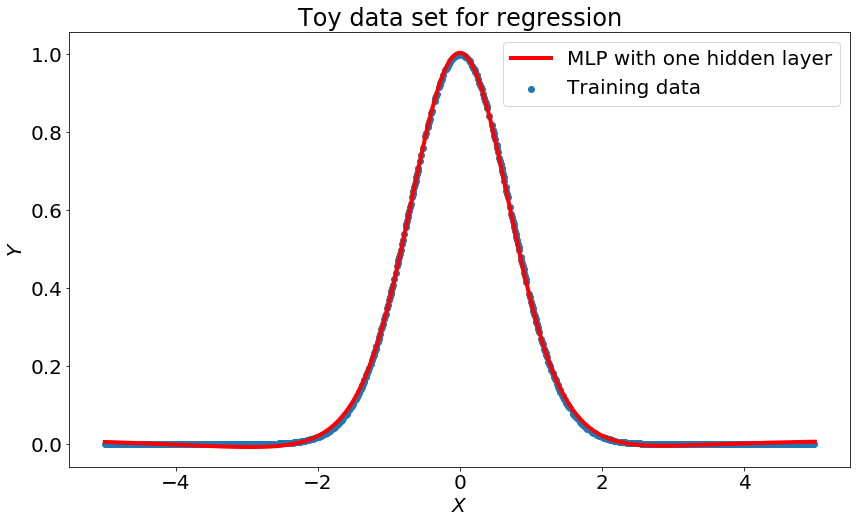

In [12]:
# use our model to predict in the range we want
X_range = np.linspace(-5, 5, 1000)
y_pred = model.predict(X_range)

fig, ax = plt.subplots(1, 1, figsize=(14,8))
ax.scatter(X_train, Y_train, label='Training data')
ax.plot(X_range, y_pred, lw=4, color='r', label='MLP with one hidden layer')

ax.set_xlabel(r'$X$', fontsize=20)
ax.set_ylabel(r'$Y$', fontsize=20)
ax.set_title('Toy data set for regression', fontsize=24)
ax.tick_params(labelsize=20)

ax.legend(loc=1, fontsize=20)

plt.show()

### Exercise
Plot the loss function as a function of the epochs.

#### Hint
You can access the loss function values with the command:
```python
model_history.history['loss']
```

### Solution

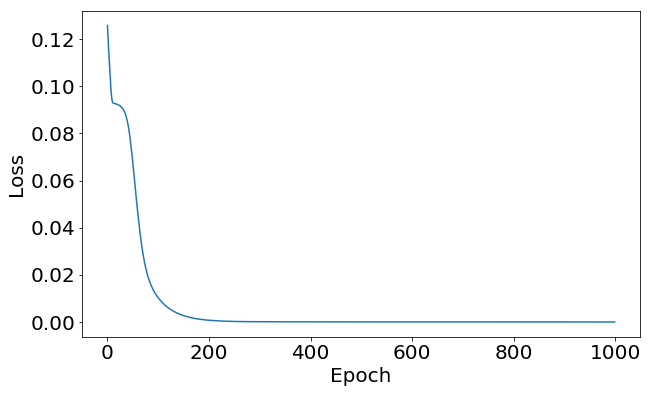

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(model_history.history['loss'])

ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.tick_params(labelsize=20)

How good is the model?  We can compute the $R^{2}$ score to get a sense of the model performance.

In [14]:
# evaluate the training and testing performance of your model 
# note: you should extract and check both the loss function and your evaluation metric
from sklearn.metrics import r2_score as r2

train_score = model.evaluate(X_train, Y_train, verbose=1)
print('Train loss:', train_score)
print('Train R2:', r2(Y_train, model.predict(X_train)))

test_score = model.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', test_score)
print('Test R2:', r2(Y_test, model.predict(X_test)))

700/700 [==============================] - 0s 54us/step
Train loss: 1.8643061827918115e-05
Train R2: 0.9998001976113056
300/300 [==============================] - 0s 31us/step
Test loss: 1.9078023542533628e-05
Test R2: 0.9997988742764838


### Exercise
Plot the train/test performace against the number of hidden nodes, H.

### Solution

In [17]:
input_dim = 1 # input dimension: just x
model = models.Sequential() # create sequential multi-layer perceptron

num_nodes = np.linspace(2.0, 32.0, 31)
train_score = np.zeros(len(num_nodes))
test_score = np.zeros(len(num_nodes))
R2_train = np.zeros(len(num_nodes))
R2_test = np.zeros(len(num_nodes))

for idx, H in enumerate(num_nodes):
    print("H = {0}".format(H))
    
    # layer 0, our hidden layer
    model.add(layers.Dense(int(H), input_dim=input_dim, 
                    kernel_initializer='normal', 
                    activation='tanh')) 
    # layer 1
    model.add(layers.Dense(1, kernel_initializer='normal', 
                activation='linear')) 

    # compile the model
    model.compile(loss='mean_squared_error', optimizer='adam')

    # fit the model
    model_history = model.fit(X_train, Y_train, batch_size=100, epochs=400, verbose=0)
    
    train_score[idx] = model.evaluate(X_train, Y_train, verbose=1)
    test_score[idx] = model.evaluate(X_test, Y_test, verbose=1)
    
    R2_train[idx] = r2(Y_train, model.predict(X_train))
    R2_test[idx] = r2(Y_test, model.predict(X_test))

H = 2.0
300/300 [==============================] - 0s 96us/step
H = 3.0
300/300 [==============================] - 0s 113us/step
H = 4.0
300/300 [==============================] - 0s 179us/step
H = 5.0
300/300 [==============================] - 0s 122us/step
H = 6.0
300/300 [==============================] - 0s 124us/step
H = 7.0
300/300 [==============================] - 0s 137us/step
H = 8.0
300/300 [==============================] - 0s 126us/step
H = 9.0
300/300 [==============================] - 0s 115us/step
H = 10.0
300/300 [==============================] - 0s 106us/step
H = 11.0
300/300 [==============================] - 0s 115us/step
H = 12.0
300/300 [==============================] - 0s 127us/step
H = 13.0
300/300 [==============================] - 0s 133us/step
H = 14.0
300/300 [==============================] - 0s 144us/step
H = 15.0
300/300 [==============================] - 0s 123us/step
H = 16.0
300/300 [==============================] - 0s 127us/step
H = 17.0
300/300 [=

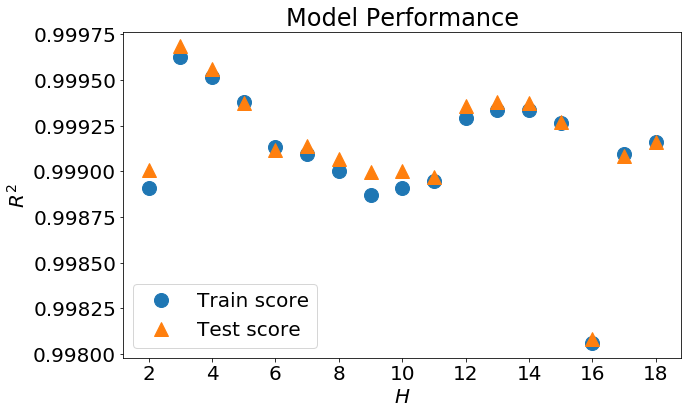

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))

ax.plot(num_nodes[:17], R2_train[:17], ls='', marker='o', ms=14, label='Train score')
ax.plot(num_nodes[:17], R2_test[:17], ls='', marker='^', ms=14, label='Test score')

ax.set_xlabel(r'$H$', fontsize=20)
ax.set_ylabel(r'$R^{2}$', fontsize=20)
ax.set_title('Model Performance', fontsize=24)
ax.tick_params(labelsize=20)

ax.legend(loc=3, fontsize=20)

In [29]:
input_dim = 1 # input dimension: just x
model = models.Sequential() # create sequential multi-layer perceptron

num_nodes = [2, 4, 6, 8, 10]
train_score = np.zeros(len(num_nodes))
test_score = np.zeros(len(num_nodes))
R2_train = np.zeros(len(num_nodes))
R2_test = np.zeros(len(num_nodes))

for idx, H in enumerate(num_nodes):
    print("H = {0}".format(H))
    
    # layer 0, our hidden layer
    model.add(layers.Dense(int(H), input_dim=input_dim, 
                    kernel_initializer='normal', 
                    activation='tanh'))
    # layer 1
    model.add(layers.Dense(1, kernel_initializer='normal', 
                activation='linear')) 

    # compile the model
    model.compile(loss='mean_squared_error', optimizer='adam')

    # fit the model
    model_history = model.fit(X_train, Y_train, batch_size=100, epochs=400, verbose=0)
    
    train_score[idx] = model.evaluate(X_train, Y_train, verbose=1)
    test_score[idx] = model.evaluate(X_test, Y_test, verbose=1)
    
    R2_train[idx] = r2(Y_train, model.predict(X_train))
    R2_test[idx] = r2(Y_test, model.predict(X_test))

H = 2
300/300 [==============================] - 0s 708us/step
H = 4
300/300 [==============================] - 0s 272us/step
H = 6
300/300 [==============================] - 0s 235us/step
H = 8
300/300 [==============================] - 0s 260us/step
H = 10
300/300 [==============================] - 0s 638us/step


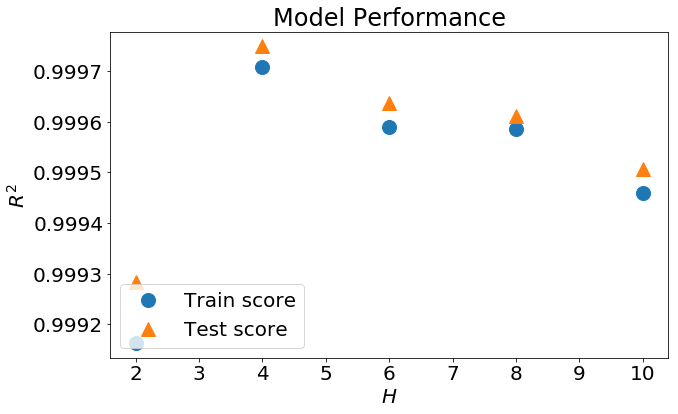

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))

ax.plot(num_nodes[:17], R2_train[:17], ls='', marker='o', ms=14, label='Train score')
ax.plot(num_nodes[:17], R2_test[:17], ls='', marker='^', ms=14, label='Test score')

ax.set_xlabel(r'$H$', fontsize=20)
ax.set_ylabel(r'$R^{2}$', fontsize=20)
ax.set_title('Model Performance', fontsize=24)
ax.tick_params(labelsize=20)

ax.legend(loc=3, fontsize=20)

## Changing the Number of Layers

Now fix a width $H$ and let's fit a MLP network with **multiple** hidden layers, each with the same width. Start with logistic or hyperbolic-tan activation functions for the hidden nodes and linear activation for the output. 


***Experiment with the number of layers and observe the effect of this on the quality of the fit.***  You want to think about issues like computational effeciency and generalizability of this type of modeling. You want to compare the MLP to your polynomial model as well as to the model with a single hidden layer (in terms of quality of fit, efficiency and generalizability).

In [24]:
# number of hidden nodes
H = 40
# input dimension
input_dim = 1

# create sequential multi-layer perceptron
model2 = models.Sequential()
# layer 0
model2.add(layers.Dense(H, input_dim=input_dim, 
                kernel_initializer='normal', 
                activation='tanh')) 
# layer 1
model2.add(layers.Dense(H,
                kernel_initializer='normal', 
                activation='tanh')) 
# layer 2
model2.add(layers.Dense(H,
                kernel_initializer='normal', 
                activation='tanh')) 
# layer 3
model2.add(layers.Dense(H,  
                kernel_initializer='normal', 
                activation='tanh')) 
# layer 4
model2.add(layers.Dense(H,  
                kernel_initializer='normal', 
                activation='tanh')) 
# layer 5
model2.add(layers.Dense(H,  
                kernel_initializer='normal', 
                activation='tanh')) 
# layer 6
model2.add(layers.Dense(1, kernel_initializer='normal', 
                activation='linear')) 

# configure the model
model2.compile(loss='mean_squared_error', optimizer='adam')

In [25]:
# fit the model
model2.fit(X_train, Y_train, batch_size=128, epochs=500, verbose=1)

Epoch 1/500
700/700 [==============================] - 10s 15ms/step - loss: 0.1243
Epoch 2/500
700/700 [==============================] - 0s 80us/step - loss: 0.1165
Epoch 3/500
700/700 [==============================] - 0s 89us/step - loss: 0.1033
Epoch 4/500
700/700 [==============================] - 0s 76us/step - loss: 0.0946
Epoch 5/500
700/700 [==============================] - 0s 81us/step - loss: 0.0953
Epoch 6/500
700/700 [==============================] - 0s 84us/step - loss: 0.0936
Epoch 7/500
700/700 [==============================] - 0s 86us/step - loss: 0.0935
Epoch 8/500
700/700 [==============================] - 0s 89us/step - loss: 0.0934
Epoch 9/500
700/700 [==============================] - 0s 81us/step - loss: 0.0933
Epoch 10/500
700/700 [==============================] - 0s 84us/step - loss: 0.0934
Epoch 11/500
700/700 [==============================] - 0s 121us/step - loss: 0.0934
Epoch 12/500
700/700 [==============================] - 0s 112us/step - loss: 0.093

700/700 [==============================] - 0s 81us/step - loss: 0.0049
Epoch 99/500
700/700 [==============================] - 0s 93us/step - loss: 0.0043
Epoch 100/500
700/700 [==============================] - 0s 83us/step - loss: 0.0036
Epoch 101/500
700/700 [==============================] - 0s 80us/step - loss: 0.0029
Epoch 102/500
700/700 [==============================] - 0s 77us/step - loss: 0.0046
Epoch 103/500
700/700 [==============================] - 0s 77us/step - loss: 0.0025
Epoch 104/500
700/700 [==============================] - 0s 79us/step - loss: 0.0022
Epoch 105/500
700/700 [==============================] - 0s 78us/step - loss: 0.0027
Epoch 106/500
700/700 [==============================] - 0s 77us/step - loss: 0.0031
Epoch 107/500
700/700 [==============================] - 0s 79us/step - loss: 0.0021
Epoch 108/500
700/700 [==============================] - 0s 65us/step - loss: 0.0021
Epoch 109/500
700/700 [==============================] - 0s 70us/step - loss: 0.

700/700 [==============================] - 0s 74us/step - loss: 3.5320e-04
Epoch 193/500
700/700 [==============================] - 0s 72us/step - loss: 4.2328e-04
Epoch 194/500
700/700 [==============================] - 0s 81us/step - loss: 5.3245e-04
Epoch 195/500
700/700 [==============================] - 0s 73us/step - loss: 4.2697e-04
Epoch 196/500
700/700 [==============================] - 0s 78us/step - loss: 3.2085e-04
Epoch 197/500
700/700 [==============================] - 0s 81us/step - loss: 2.8986e-04
Epoch 198/500
700/700 [==============================] - 0s 78us/step - loss: 3.0442e-04
Epoch 199/500
700/700 [==============================] - 0s 78us/step - loss: 3.1483e-04
Epoch 200/500
700/700 [==============================] - 0s 72us/step - loss: 3.2991e-04
Epoch 201/500
700/700 [==============================] - 0s 79us/step - loss: 3.0319e-04
Epoch 202/500
700/700 [==============================] - 0s 78us/step - loss: 4.3105e-04
Epoch 203/500
700/700 [============

700/700 [==============================] - 0s 76us/step - loss: 1.6712e-04
Epoch 285/500
700/700 [==============================] - 0s 74us/step - loss: 1.5232e-04
Epoch 286/500
700/700 [==============================] - 0s 84us/step - loss: 1.5206e-04
Epoch 287/500
700/700 [==============================] - 0s 70us/step - loss: 1.5381e-04
Epoch 288/500
700/700 [==============================] - 0s 75us/step - loss: 1.4692e-04
Epoch 289/500
700/700 [==============================] - 0s 79us/step - loss: 1.3497e-04
Epoch 290/500
700/700 [==============================] - 0s 73us/step - loss: 1.9243e-04
Epoch 291/500
700/700 [==============================] - 0s 79us/step - loss: 1.7963e-04
Epoch 292/500
700/700 [==============================] - 0s 73us/step - loss: 1.3524e-04
Epoch 293/500
700/700 [==============================] - 0s 82us/step - loss: 1.5033e-04
Epoch 294/500
700/700 [==============================] - 0s 72us/step - loss: 1.4736e-04
Epoch 295/500
700/700 [============

700/700 [==============================] - 0s 81us/step - loss: 1.1975e-04
Epoch 377/500
700/700 [==============================] - 0s 82us/step - loss: 1.0676e-04
Epoch 378/500
700/700 [==============================] - 0s 78us/step - loss: 1.0981e-04
Epoch 379/500
700/700 [==============================] - 0s 76us/step - loss: 8.6639e-05
Epoch 380/500
700/700 [==============================] - 0s 71us/step - loss: 9.6339e-05
Epoch 381/500
700/700 [==============================] - 0s 79us/step - loss: 8.9276e-05
Epoch 382/500
700/700 [==============================] - 0s 71us/step - loss: 7.5409e-05
Epoch 383/500
700/700 [==============================] - 0s 76us/step - loss: 8.1470e-05
Epoch 384/500
700/700 [==============================] - 0s 78us/step - loss: 8.0084e-05
Epoch 385/500
700/700 [==============================] - 0s 77us/step - loss: 9.9871e-05
Epoch 386/500
700/700 [==============================] - 0s 80us/step - loss: 1.7288e-04
Epoch 387/500
700/700 [============

700/700 [==============================] - 0s 82us/step - loss: 1.4345e-04
Epoch 468/500
700/700 [==============================] - 0s 79us/step - loss: 1.6949e-04
Epoch 469/500
700/700 [==============================] - 0s 85us/step - loss: 1.6647e-04
Epoch 470/500
700/700 [==============================] - 0s 79us/step - loss: 1.7973e-04
Epoch 471/500
700/700 [==============================] - 0s 96us/step - loss: 8.4631e-05
Epoch 472/500
700/700 [==============================] - 0s 98us/step - loss: 7.4370e-05
Epoch 473/500
700/700 [==============================] - 0s 91us/step - loss: 8.6394e-05
Epoch 474/500
700/700 [==============================] - 0s 86us/step - loss: 7.8566e-05
Epoch 475/500
700/700 [==============================] - 0s 76us/step - loss: 5.7724e-05
Epoch 476/500
700/700 [==============================] - 0s 82us/step - loss: 5.6618e-05
Epoch 477/500
700/700 [==============================] - 0s 79us/step - loss: 4.5369e-05
Epoch 478/500
700/700 [============

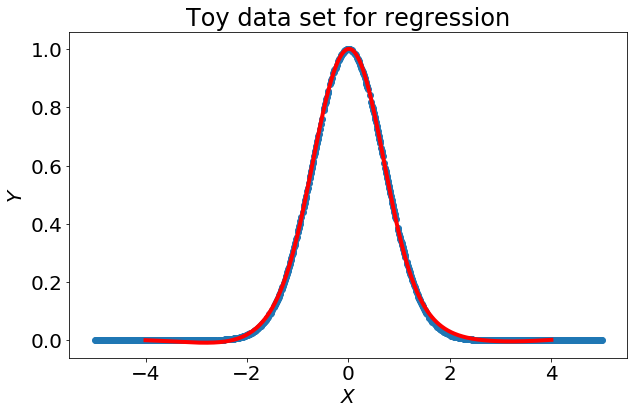

In [26]:
# use our model to predict in the range we want
X_range = np.linspace(-4, 4, 500)
y_pred = model2.predict(X_range)

fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.scatter(X_train, Y_train, label='Training data')
ax.plot(X_range, y_pred, lw=4, color='r', label='MLP with 6 hidden layers')

ax.set_xlabel(r'$X$', fontsize=20)
ax.set_ylabel(r'$Y$', fontsize=20)
ax.set_title('Toy data set for regression', fontsize=24)
ax.tick_params(labelsize=20)

plt.show()

In [27]:
# evaluate the training and testing performance of your model 
# note: you should extract and check both the loss function and your evaluation metric
score = model2.evaluate(X_train, Y_train, verbose=1)
print('Train loss:', score)
print('Train R2:', r2(Y_train, model2.predict(X_train)))

Train loss: 3.729569390998222e-05
Train R2: 0.9996002926095076


In [28]:
score = model2.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', score)
print('Test R2:', r2(Y_test, model2.predict(X_test)))

300/300 [==============================] - 0s 308us/step
Test loss: 3.847057019205143e-05
Test R2: 0.9995944327276152


What if we wanted to approximate a different function $f$ with MLP's? ***Experiment with approximating a few different non-linear functions with wide but shallow networks as well as deep but narrow networks.***

How expressive do you think MLP's are?